# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

***IMPORT LIBRARIES***

In [1]:
import tensorflow as tf
import numpy as np
import math
import time
import random
import pickle
import csv  
#To shuffle Test data
from sklearn.utils import shuffle
#To Split Test data into test set and validation set
from sklearn.model_selection import train_test_split
import cv2
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

---
## Step 0: Load The Data

In [2]:

training_file = 'train.p'
testing_file = 'test.p'
label_file ='signnames.csv'
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(label_file, 'rt') as f:
    reader = csv.reader(f)
    label_names = list(reader)
X_train,y_train = train['features'],train['labels']
X_test,y_test = test['features'],test['labels']    
X_train,y_train=shuffle(X_train,y_train)

X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.20,random_state=1)
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


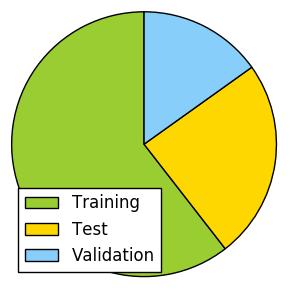

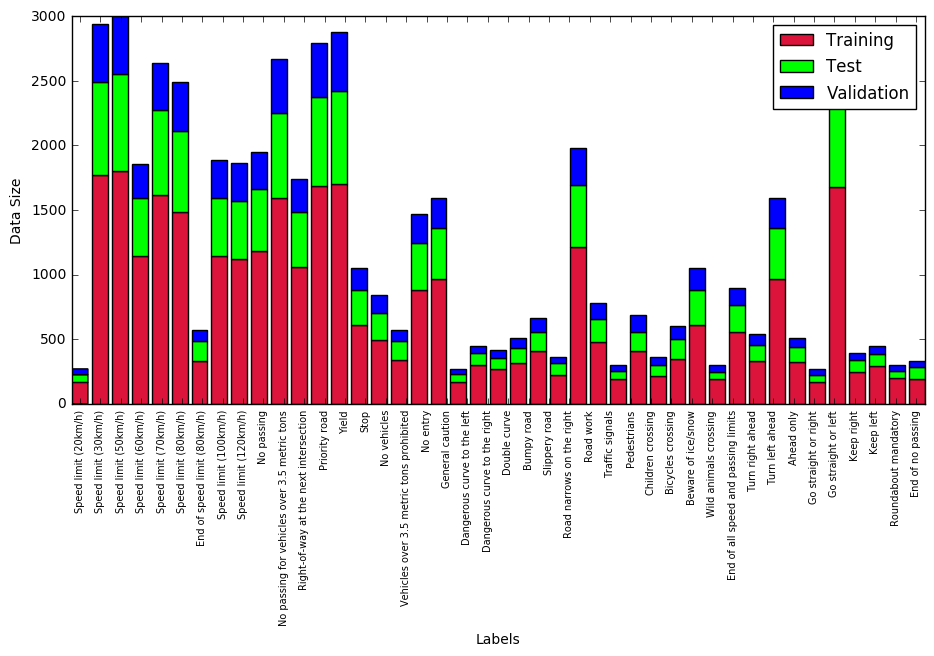

In [112]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(train['features'])

# TODO: Number of testing examples.
n_test = len(test['features'])

# TODO: What's the shape of an traffic sign image?
image_shape = (32,32)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(label_names)-1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

list_of_traffic_labels=[]
index_for_plot_x=[]
for i in range(43):
    list_of_traffic_labels.append(get_name_of_the_label(i))
    index_for_plot_x.append(i)

#Data (Training, Test, Validation) Visualization
plt.figure(1,(3,3))
labels_pie = ['Training','Test','Validation']
sizes_pie = [len(y_train),len(y_test),len(y_validation)]
colors_pie = ['yellowgreen', 'gold', 'lightskyblue']
patches_pie, texts = plt.pie(sizes_pie, colors=colors_pie, startangle=90)
plt.legend(patches_pie, labels_pie, loc="best")
plt.title='a'
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

plt.figure(2,(11,5))

plt.xlabel("Labels")
plt.ylabel("Data Size")

plt.xticks(index_for_plot_x, list_of_traffic_labels, rotation='90',fontsize='7')
plt.hist([y_train,y_test,y_validation],histtype='bar',fill=True,stacked=True,bins=43,align='left',color=['crimson', 'lime', 'blue'],
                            label=['Training', 'Test', 'Validation'])
plt.legend()

plt.show()

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [49]:
# Get label name from training labels. It is useful to get name rather than number and match it.
def get_label_from_train_data(index):
    return label_names[y_train[index]+1][1]
# Get label name from test labels.
def get_label_from_test_data(index):
    return label_names[y_test[index]+1][1]
# Get labels name from cvs file
def get_name_of_the_label(index):
    # 1st [0] is the heading and 2nd [1] column is the label name
    return label_names[index+1][1]
# To draw rect on image.
def drawRect(img,coordX,coordY,color=[20,200,30]):
    cv2.rectangle(img,coordX,coordY,color)

No passing | coord: [ 5  5 57 52]
Training set index: 9


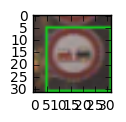

In [5]:

#get a random number b/w 0 to the length of training dataset
index = random.randint(0, len(X_train))
#get image from training dataset
image = X_train[index]
#get coordinates to outline the shape
coord=train['coords'][index]
#drawing rectangle using cordinates, and I also clip bottom right because some coordinates are out of the images and doesn't
#look good
drawRect(image,(coord[0],coord[1]),(np.clip(coord[2],0,31),np.clip(coord[3],0,31)))
print(get_label_from_train_data(index)+ ' | coord: '+str(coord))
plt.figure(figsize=(1,1))
plt.imshow(image)
print('Training set index: '+str(y_train[index]))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

# Load Existing Model to predict

In [6]:
from tensorflow.contrib.layers import flatten

# I reset the default graph before defining any new variable.
tf.reset_default_graph()
#Algorithm is used in SDCND class with mnist dataset. I change 1st layer weight from (5,5,1,6) to (5,5,3,6) because I will
#feed rgb image not grayscale, in traffic signs, color is also important factor.
# I also modified last layer to output 43 labels instead of 10 (mnist dataset 0 to 9)
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma),name="conv1_W")
    conv1_b = tf.Variable(tf.zeros(6),name="conv1_b")
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma),name="conv2_W")
    conv2_b = tf.Variable(tf.zeros(16),name="conv2_b")
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma),name="fc1_W")
    fc1_b = tf.Variable(tf.zeros(120),name="fc1_b")
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma),name="fc2_W")
    fc2_b  = tf.Variable(tf.zeros(84),name="fc2_b")
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma),name="fc3_W")
    fc3_b  = tf.Variable(tf.zeros(43),name="fc4_W")
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [7]:
# placeholder to take dataset of Nx32x32x3 dimension, for single image N=1
x = tf.placeholder(tf.float32, (None, 32, 32, 3),name="x_placeholder")
# placeholder for labels used for training and evaluation
y = tf.placeholder(tf.int32, (None),name="y_placeholder")
# one hot encoding all labels
one_hot_y = tf.one_hot(y, 43)
# rate for learning
rate = 0.001
logits = LeNet(x)
#calculate cross entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
#calculate loss
loss_operation = tf.reduce_mean(cross_entropy)
#using Adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
#minimizing loss
training_operation = optimizer.minimize(loss_operation)

In [8]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

EPOCHS = 50
BATCH_SIZE = 256

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess =tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def evaluate_with_session(X_data, y_data,ses):
    num_examples = len(X_data)
    total_accuracy = 0
    sess =ses
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

**Train Neural Network** [Do not run next cell unless you want to train)

In [17]:

#Create session to start training
with tf.Session() as sess:
    # Variables must be initialized before use
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    total_time=0
    print("Training...")
    print()
    for i in range(EPOCHS):
        tx_time=time.time()
        #Again Shuffle, no needs to do just did it.
        X_train, y_train = shuffle(X_train, y_train)
        #Batching and training
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        #Evaluate accuracy on each batch using validation dataset    
        validation_accuracy = evaluate(X_validation, y_validation)
        tx_time = time.time()-tx_time
        total_time+=tx_time
        print("EPOCH {}/{}\t|\tTime = {:.3f} sec".format(i+1,EPOCHS,tx_time))
        print("Validation Accuracy =\t{:.3f}%".format(validation_accuracy*100))
        print()
    if(total_time>60):
        print("Total Time =\t {:.3f} min".format(total_time/60))
    else:        
        print("Total Time =\t {:.3f} sec".format(total_time))
    saver.save(sess, './lenet_assignment_2')
    print("Model saved!")

Training...

EPOCH 1/50	|	Time = 15.558 sec
Validation Accuracy =	52.091%

EPOCH 2/50	|	Time = 15.459 sec
Validation Accuracy =	77.047%

EPOCH 3/50	|	Time = 15.516 sec
Validation Accuracy =	85.527%

EPOCH 4/50	|	Time = 15.513 sec
Validation Accuracy =	90.334%

EPOCH 5/50	|	Time = 15.546 sec
Validation Accuracy =	91.495%

EPOCH 6/50	|	Time = 15.604 sec
Validation Accuracy =	92.629%

EPOCH 7/50	|	Time = 15.918 sec
Validation Accuracy =	93.764%

EPOCH 8/50	|	Time = 15.755 sec
Validation Accuracy =	94.466%

EPOCH 9/50	|	Time = 15.709 sec
Validation Accuracy =	95.537%

EPOCH 10/50	|	Time = 15.794 sec
Validation Accuracy =	95.499%

EPOCH 11/50	|	Time = 15.877 sec
Validation Accuracy =	95.384%

EPOCH 12/50	|	Time = 15.865 sec
Validation Accuracy =	95.894%

EPOCH 13/50	|	Time = 15.972 sec
Validation Accuracy =	95.218%

EPOCH 14/50	|	Time = 15.931 sec
Validation Accuracy =	96.072%

EPOCH 15/50	|	Time = 16.052 sec
Validation Accuracy =	95.919%

EPOCH 16/50	|	Time = 16.126 sec
Validation Accuracy

trained this algorithm on **1080GTX, 32 GB RAM, 4.0GHz i7**

**Restore model and evaluate on test dataset**

In [9]:
#Create saver to restore model.
saver = tf.train.Saver()
#Normalize logits using softmax
prediction=tf.nn.softmax(logits)
#Get to K predictions
prediction_label=tf.arg_max(prediction,dimension=1)
n_top = 5
predictions = tf.placeholder(tf.float32)
top_k = tf.nn.top_k(predictions, k=n_top)


sess= tf.Session()
    
saver.restore(sess, tf.train.latest_checkpoint('.',latest_filename='./checkpoint'))
test_accuracy = evaluate_with_session(X_test, y_test,sess)
print("Test Accuracy = {:.3f}%".format(test_accuracy*100))

Test Accuracy = 91.520%


**Predicting Single Image**
This is not the part of assignment but I want to predict a single image later I will use a video to predict traffic sign in the video frames but don't know why it is always wrong and new values :/

Index [test label]# 444, Name: Road work
Prediction: Road work, ID# [25]
Result: True


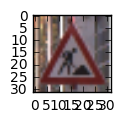

In [10]:
#Select random image from test dataset
index = random.randint(0, len(X_test))
image = X_test[index].squeeze()
#Fit in small area
#Input is single image and we have to pass Nx32x32x3 data so need to reshape it
image_4D= image.reshape(1, 32,32,3)
#Setting x (Input variable) to the image we want to predict
feed_dict = {x:image_4D}


#Predicting image using softmax
pred_test = sess.run(prediction_label,feed_dict)
#Getting top k(5) predictions
top_k_custom = sess.run(tf.nn.top_k(prediction, k=n_top),feed_dict=feed_dict)

#Get the name of the sign predicted by the model
pred_test_label=get_name_of_the_label(pred_test[0])
#Get the known label name
test_data_label=get_label_from_test_data(index)
print('Index [test label]# {}, Name: {}'.format(str(index),test_data_label))
print('Prediction: {}, ID# {}'.format(pred_test_label,pred_test))
print('Result: {}'.format(pred_test_label==test_data_label))
plt.figure(1,figsize=(1,1))
plt.title = 'Actual Label: {} | Predicted Label {}'.format(test_data_label,pred_test_label)
plt.imshow(image)


Test on new Images

New Image: Speed limit (30km/h), Index: 1


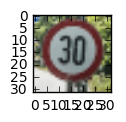

In [11]:
#Extra Image : image copy from google
#stop_image=plt.imread('./stop2.jpg')
# I find this particular region by trial and error manually.
#stop_image=stop_image[400:750, 890:1200]

stop_image=plt.imread('./sign_09.jpg')

#Resized it to 32x32
stop_image=cv2.resize(stop_image,(32,32))

plt.figure(2,(1,1))
plt.imshow(stop_image)
image_4D_stop= stop_image.reshape(1, 32,32,3)
feed_dict_stop = {x:image_4D_stop}

#Predicting image using softmax
pred_test = sess.run(prediction_label,feed_dict)
#Getting top k(5) predictions
top_k_custom = sess.run(tf.nn.top_k(prediction, k=n_top),feed_dict=feed_dict)
top_k_custom = np.array([top_k_custom.values,top_k_custom.indices])
#tf.nn.top_k(top_k_custom, 2)
top_prob_images_from_k = tf.nn.top_k(top_k_custom, 5)
top_prob_image_from_k = sess.run(top_prob_images_from_k)
#print(top_prob_image_from_k)

#Computing using softmax
pred_test_image = sess.run(prediction_label,feed_dict_stop)
pred_test_label_image=get_name_of_the_label(pred_test_image[0])
print("New Image: {}, Index: {}".format(pred_test_label_image,pred_test_image[0]))

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I load training and testing data, then split training data into 20% validation set and 80% training set. Then shuffle the training data.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I set 20% validation data from training data. and shuffle training data using sklrearn utility function 'shuffle' to prevent biases because of feature sequences might be present in the data and to prevent the order of learning. I made some functions to get the label name by their number.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I used LeNET architecture, 50 epoch, batch size 256, 5 layers.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Adam Optimizer (learning rate = 0.001) | batch size = 256 | 50 epochs | hyperparameters: initial layer wight Normalizd(0 mean and 0.1 sigma) | input size (?,32,32,3)

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I used Lenet solution used in MNIST dataset classification video. I want to train color image not grayscale but the architecture of Lenet code was set for single channel so I changed 1st layer. and also the output size of labels in the very last layer. In the begining I was not much familier with Tensor flow sessions and python 'with' keyword which open and close the session. I used seperate session just for prediction and I was always getting wrong result, then my mentor advised me to learn about python 'with' keyword. After that everything works awesome! One of the biggest problem I faced was with the variables initialization. Tensorflow rename it automatically, each time I run any cell having variable tf assign a new name. when I saved the model. it use auto generated name, unfamiliar to me. Whenever I tried to restore checkpoint I was hit by these errors. Then again I was advised by my mentor, to assign proper names to the variable. Now everythings looks good except I want to use a large image and predict these sign and location of the sign in it.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

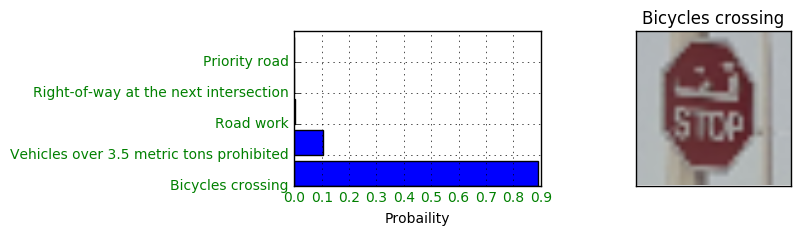

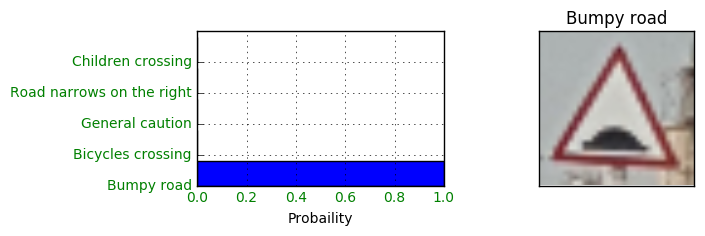

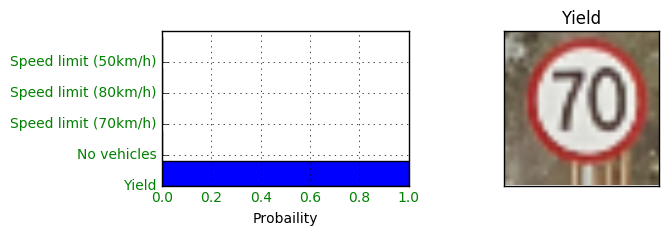

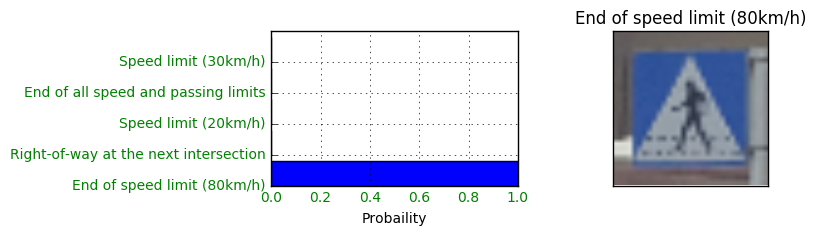

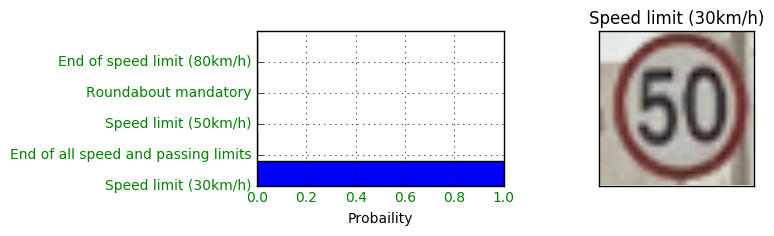

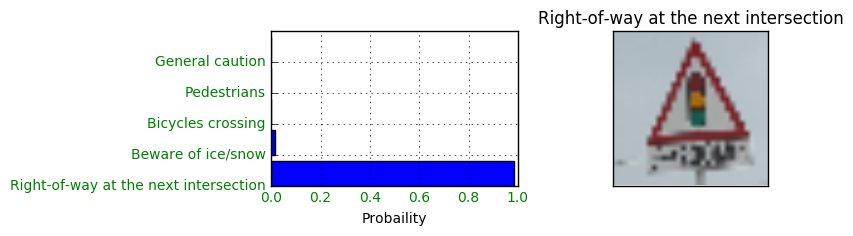

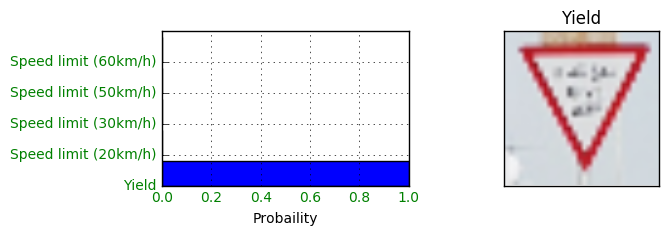

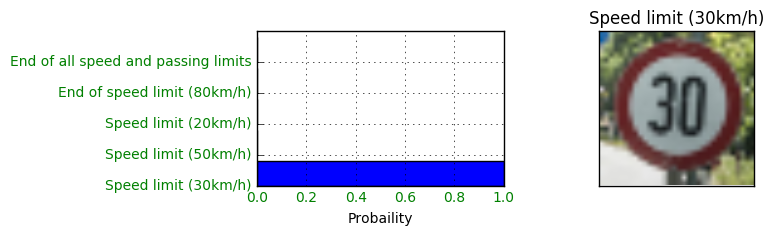

In [731]:
## Extra Images
extra_images=[]
for i in range(8):
    extra_images.append('./sign_0{}.jpg'.format(i+1))

for i in range(len(extra_images)):
    bh_test_image=plt.imread(extra_images[i])
    #Resized it to 32x32
    bh_test_image=cv2.resize(bh_test_image,(32,32))
    plt.figure(2,(1,1))
    image_4D_bh= bh_test_image.reshape(1, 32,32,3)
    feed_dict_bh = {x:image_4D_bh}
    
    pred_test_bh_ = sess.run(tf.nn.top_k(prediction, k=n_top),feed_dict=feed_dict_bh)

    pred_test_bh_inds = np.array(pred_test_bh_.indices.reshape(-1))
    pred_test_bh_vals = np.array(pred_test_bh_.values.reshape(-1))
    pred_test_bh = np.r_[pred_test_bh_inds[None,:],pred_test_bh_vals[None,:]]
    pred_test_label_bh=get_name_of_the_label(int(pred_test_bh[0][0]))
        
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figheight(2)
    f.set_figwidth(7)
    ax1.barh([1,2,3,4,5],pred_test_bh_vals)
    ax1.tick_params(labelcolor='green', top='off', bottom='off', left='on', right='off')
    ax1.set_xlabel("Probaility")
    ax1.set_yticklabels((get_name_of_the_label(pred_test_bh_inds[0]),get_name_of_the_label(pred_test_bh_inds[1]),
                            get_name_of_the_label(pred_test_bh_inds[2]),get_name_of_the_label(pred_test_bh_inds[3]),
                            get_name_of_the_label(pred_test_bh_inds[4])))
    ax1.grid(True)
    ax2.tick_params(labelcolor='None', top='off', bottom='off', left='off', right='off')
    ax2.set_title(pred_test_label_bh)
    ax2.imshow(bh_test_image)

I took some images on Bahraini roads, most of them have Arabic caption as well, may be this is reason that it
make the prediction wrong.But this model is identifying speed limit 30km/h and 
Bumpy road (in Bahrain it is known as Hump).

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

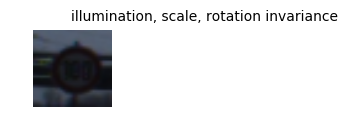

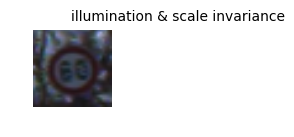

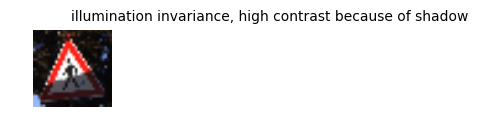

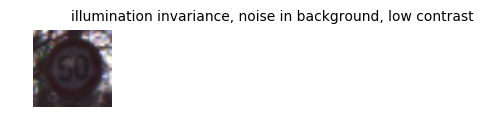

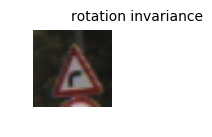

In [117]:
#followings are ids of images in test dataset that are not recognized correctly
#5534,8051, 11415, 6006,184
imgs_difficult=[]
imgs_difficult.append(X_test[5534])
imgs_difficult.append(X_test[8051])
imgs_difficult.append(X_test[11415])
imgs_difficult.append(X_test[6006])
imgs_difficult.append(X_test[184])
problem = ['illumination, scale, rotation invariance','illumination & scale invariance',
           'illumination invariance, high contrast because of shadow','illumination invariance, noise in background, low contrast',
           'rotation invariance',]
for i in range(len(imgs_difficult)):
    plt.figure(i,(1,1))
    plt.axis('off')
    plt.suptitle(problem[i],y=1.1,horizontalalignment='left')
    plt.title=problem[i]
    plt.imshow(imgs_difficult[i])

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

My model is **~91%** accurate on test dataset. I used 8 custom images and the prediction accuracy is only **25%**, may  be because of [scale,rotation] invariance, and some of the labels have Arabic labels that might be result in wrong prediction. If I added more data with different size, rotation, illumination that would help in making more accurate prediction.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

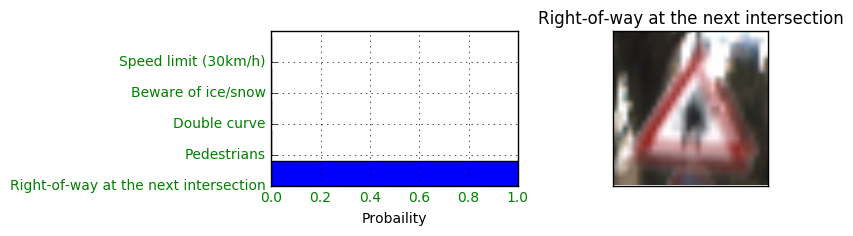

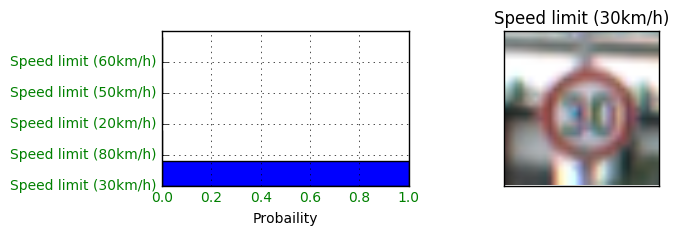

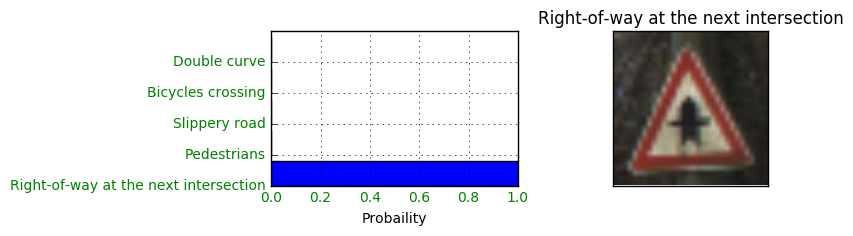

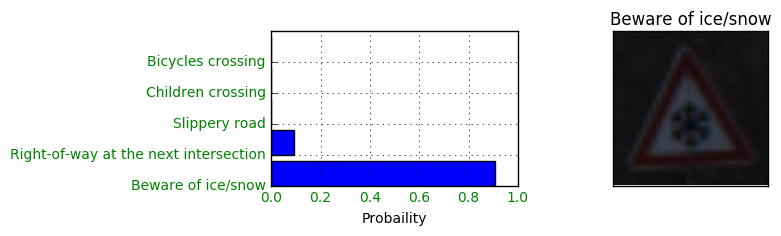

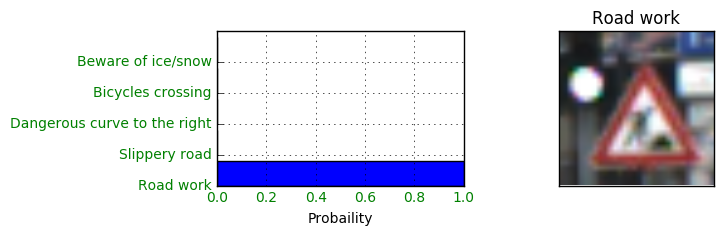

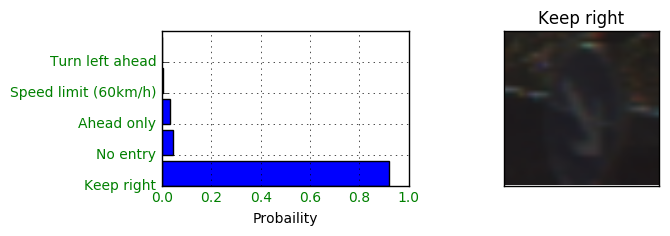

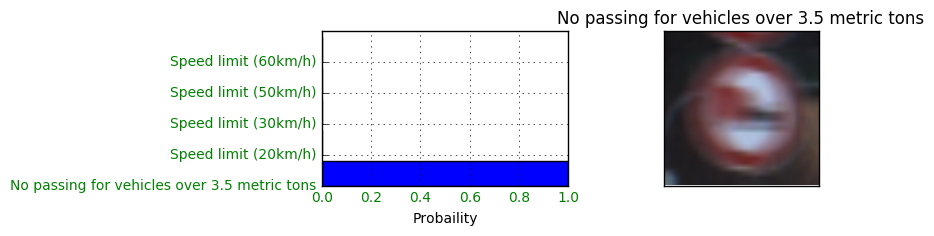

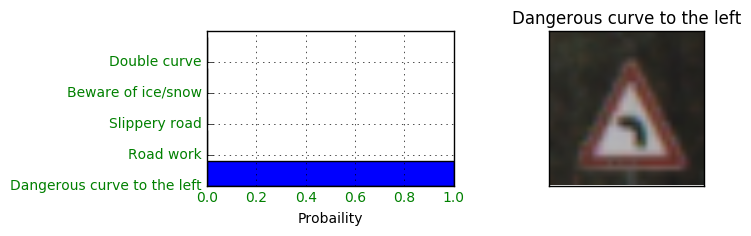

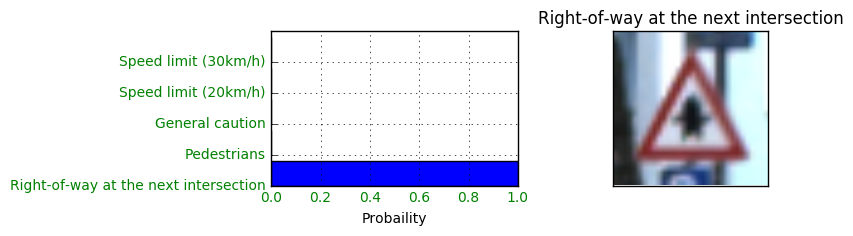

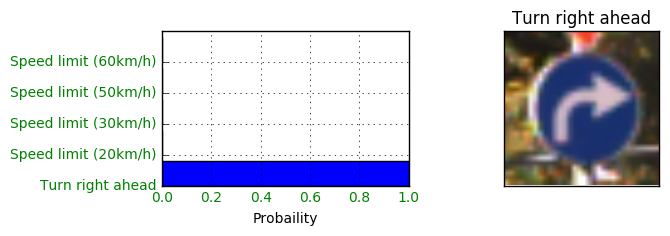

In [737]:
for i in range(10):
    bh_test_image_1= X_test[random.randint(0,len(X_test))]
    
    image_4D_bh_1= bh_test_image_1.reshape(1, 32,32,3)
    feed_dict_bh_1 = {x:image_4D_bh_1}
    
    pred_test_bh_1 = sess.run(tf.nn.top_k(prediction, k=n_top),feed_dict=feed_dict_bh_1)

    pred_test_bh_inds_1 = np.array(pred_test_bh_1.indices.reshape(-1))
    pred_test_bh_vals_1 = np.array(pred_test_bh_1.values.reshape(-1))
    pred_test_bh_1 = np.r_[pred_test_bh_inds_1[None,:],pred_test_bh_vals_1[None,:]]
    pred_test_label_bh_1=get_name_of_the_label(int(pred_test_bh_1[0][0]))
        
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figheight(2)
    f.set_figwidth(7)
    ax1.barh([1,2,3,4,5],pred_test_bh_vals_1)
    ax1.tick_params(labelcolor='green', top='off', bottom='off', left='on', right='off')
    ax1.set_xlabel("Probaility")
    ax1.set_yticklabels((get_name_of_the_label(pred_test_bh_inds_1[0]),get_name_of_the_label(pred_test_bh_inds_1[1]),
                            get_name_of_the_label(pred_test_bh_inds_1[2]),get_name_of_the_label(pred_test_bh_inds_1[3]),
                            get_name_of_the_label(pred_test_bh_inds_1[4])))
    ax1.grid(True)
    ax2.tick_params(labelcolor='None', top='off', bottom='off', left='off', right='off')
    ax2.set_title(pred_test_label_bh_1)
    ax2.imshow(bh_test_image_1)